This notebook contains the practice codes of Linear Regression, Logistic Regression and Decision Trees demonstrated in the Week 2 of the "Introduction to Machine Learning" course offered by IIT Kharagpur on the online NPTEL learning portal.

In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

## **1. Linear regression**
===================

# Prepare data

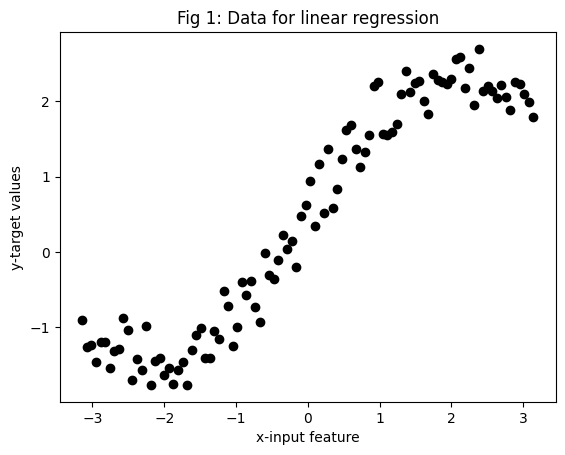

In [2]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

# Split the dataset into training, validation and test sets

In [3]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

# Fit a line to the data

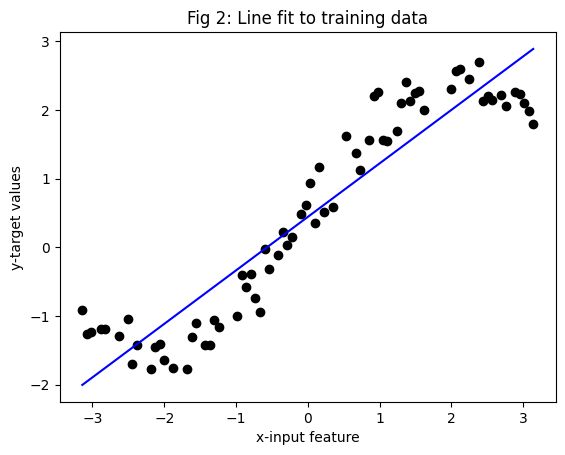

In [4]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.array(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.array(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

# Evaluate the model

In [5]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  5.304588219185782 
Test MSE:  3.0785888747670196


## **2. Logistic regression**
===================

# Prepare data

<ipython-input-6-5072913d1089>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
<ipython-input-6-5072913d1089>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated i

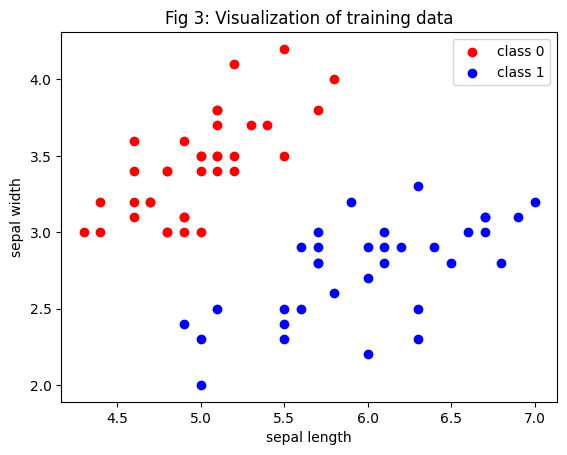

In [6]:
iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

# Fit logistic regression model

<ipython-input-7-aed021805618>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
<ipython-input-7-aed021805618>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)


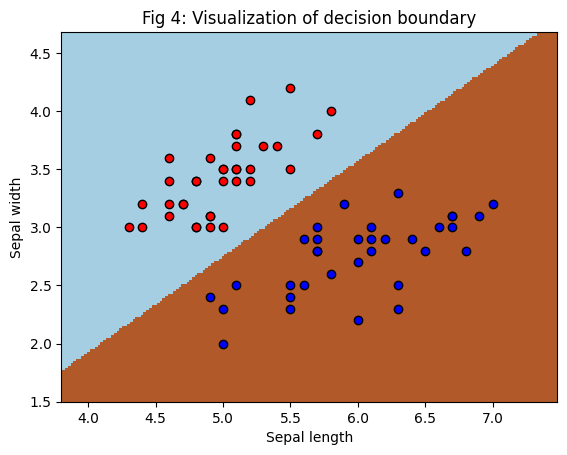

In [7]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

# Evaluate the model

In [8]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 6.666666666666667 %
test misclassification percentage = 0.0 %


Zero misclassification error was possible only because the two classes were linearly separable in the chosen feature space. However this is seldom the case in most real-world classification problems.

## **3. Decision tree regression**
===================

Now we will solve the same problems using a decision tree. A decision tree is a non-parametric machine learning model in contrast to linear/logistic regression which is a parametric model.

# Prepare data

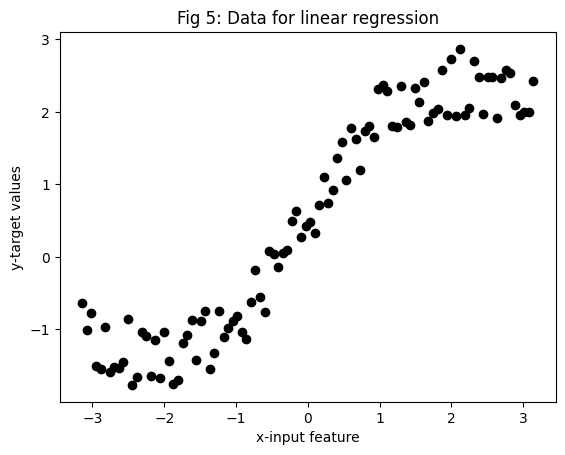

In [9]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

# Split the data into training, validation and test sets

In [10]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

# Fit a line to the data

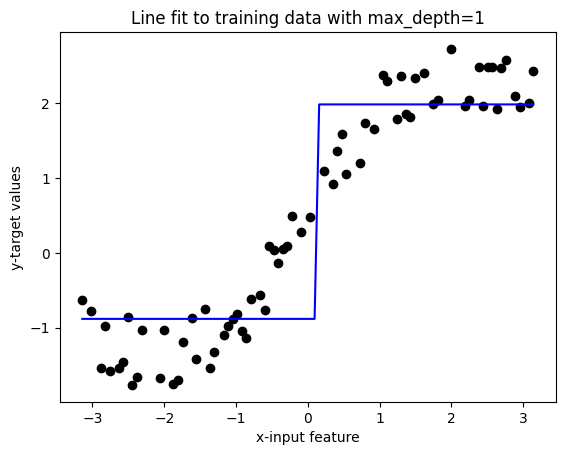

Training MSE:  0.3266672920204487 
Validation MSE:  0.3231138522791997 
Test MSE:  0.5645857803683916


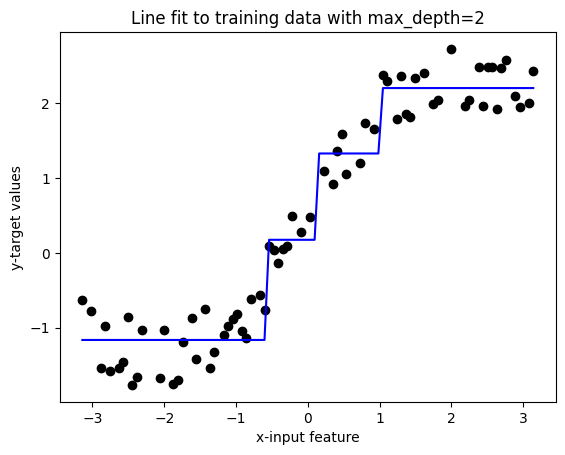

Training MSE:  0.09939400122903137 
Validation MSE:  0.178950848678889 
Test MSE:  0.19994075838014388


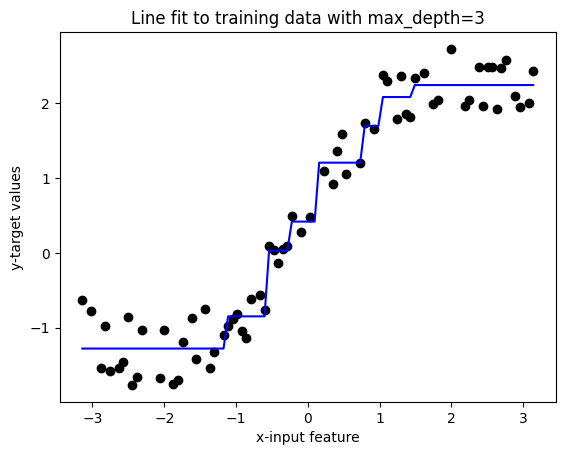

Training MSE:  0.07300240732979436 
Validation MSE:  0.1199153315035806 
Test MSE:  0.1444656102613076


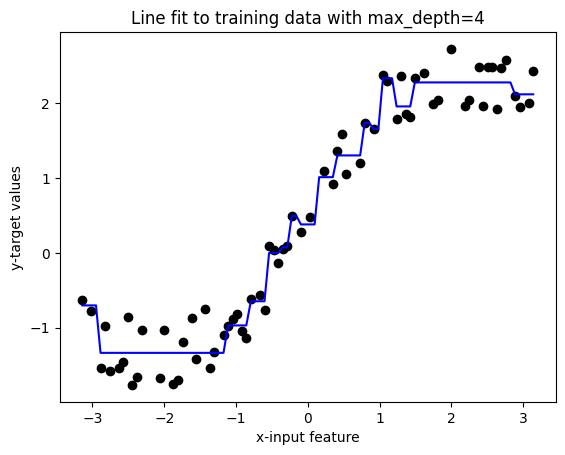

Training MSE:  0.05404876950656601 
Validation MSE:  0.136742936337857 
Test MSE:  0.13782941763402473


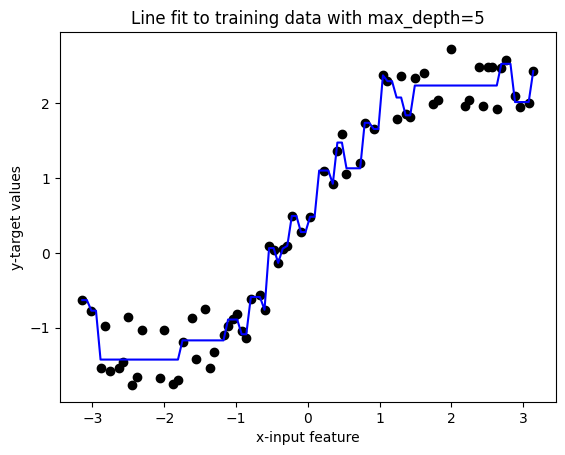

Training MSE:  0.0413364870634733 
Validation MSE:  0.12232186343374749 
Test MSE:  0.14888449358254924


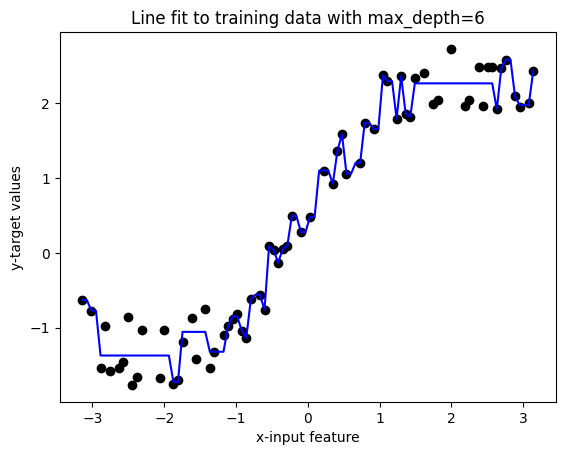

Training MSE:  0.03169741777575444 
Validation MSE:  0.12572420305970605 
Test MSE:  0.14962130902809517


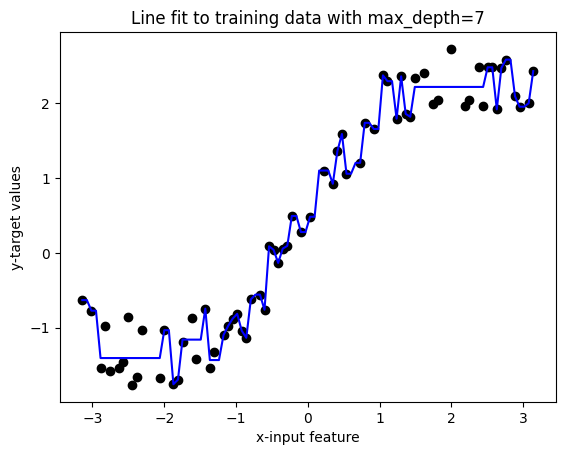

Training MSE:  0.02530993848060335 
Validation MSE:  0.14142305625239232 
Test MSE:  0.160821258257463


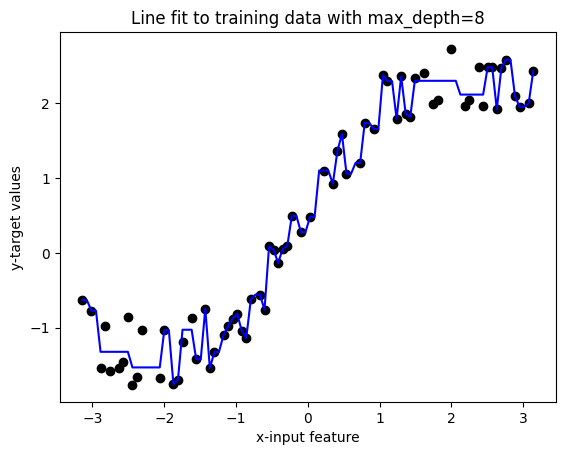

Training MSE:  0.02090846249650895 
Validation MSE:  0.16414961721094987 
Test MSE:  0.17961558578994516


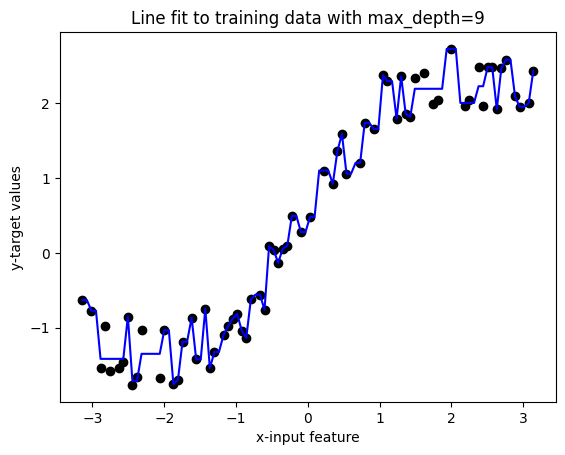

Training MSE:  0.010529657630275755 
Validation MSE:  0.16173041296334661 
Test MSE:  0.2527768175289194


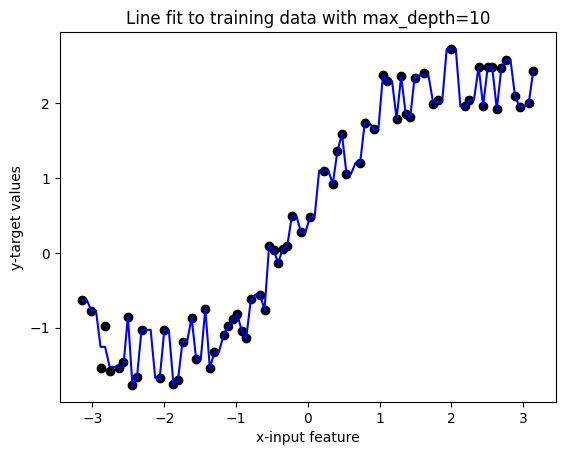

Training MSE:  0.002469635036041933 
Validation MSE:  0.17655937257346366 
Test MSE:  0.29292371081830254


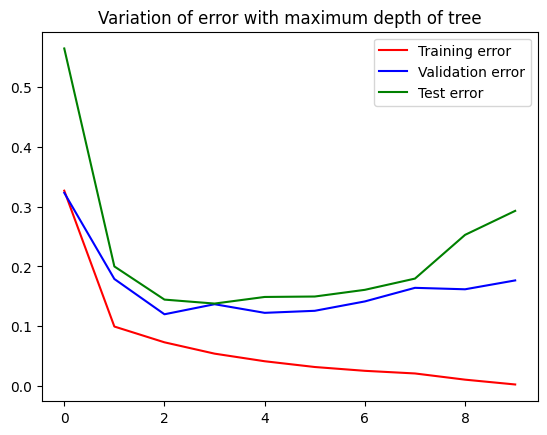

In [11]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:

    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.array(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.array(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()

    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()


Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.

## **3. Decision tree classification**
===================

# Prepare the data-set

In [12]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

# Fit the model

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Evaluate the model

In [15]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 9.090909090909092 %
test misclassification percentage = 0.0 %
